### **Purpose: ** 

In [1]:
player = 'Darren Appleton'
team = 'e'

In [2]:
import pickle
import pandas as pd

In [3]:
path = '//DREW/Users/andrew/Desktop/mosconi/'
dframe = pickle.load(open(path+'pkl/allyears_clean_locs','rb'))
if 'a' in team.lower():
    df = dframe[dframe.loc[:,'American_player'].str.contains(player)]
    df['Europe_lost'] = ~ df.loc[:,'Europe_won']
    df = df.loc[:,['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'Europe_lost','Europe_won']]
    df.columns = ['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'America_won', 'America_lost']
else:
    df = dframe[dframe.loc[:,'European_player'].str.contains(player)]
    df['Europe_lost'] = ~ df.loc[:,'Europe_won']

c:\users\andrew\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
def stats(df):
    try:
        if 'a' in team.lower():
            win = df['America_won'].sum()
            loss = df['America_lost'].sum()
        else:
            win = df['Europe_won'].sum()
            loss = df['Europe_lost'].sum()
        mp= win+loss
        wl = 'Win-loss: {}-{}'.format(win,loss)
        pct = round(win/(win+loss)*100,0)
        return('Matches Played: {}'.format(mp),wl,'Pct: {}'.format(pct))
    except:
        return('No matches to display')

### Lets have a quick look at his overall stats by checking out his singles, doubles, and team stats.

In [5]:
sing = df[df['Format']=='Singles']
dub = df[df['Format']=='Doubles']
teams = df[df['Format']=='Teams']
triples = df[df['Format']=='Triples'] 

In [6]:
'Overall: {}'.format(stats(df))
'Singles: {}'.format(stats(sing))
'Doubles: {}'.format(stats(dub))
'Teams:   {}'.format(stats(teams))
'Triples: {}'.format(stats(triples))

"Overall: ('Matches Played: 47', 'Win-loss: 25-22', 'Pct: 53.0')"

"Singles: ('Matches Played: 14', 'Win-loss: 10-4', 'Pct: 71.0')"

"Doubles: ('Matches Played: 25', 'Win-loss: 10-15', 'Pct: 40.0')"

"Teams:   ('Matches Played: 8', 'Win-loss: 5-3', 'Pct: 62.0')"

'Triples: No matches to display'

## So he plays *significantly* better in singles matches (71% doubles vs 40% singles)!!!

### Let's see if he plays better with certain partners. 

In [33]:
if 'a' in team.lower():
    dub = dub[['European_player','American_player','America_won','America_lost']]
    dub['Partner']=dub['American_player'].str.replace(player,'')
    dub['Partner']=dub['Partner'].str.replace('&','')
    dub['Partner']=dub['Partner'].str.strip()
    dub.groupby('Partner').sum().sort_values(['America_won','America_lost'],ascending=False)    
else:
    dub = dub[['European_player','American_player','Europe_won','Europe_lost']]
    dub['Partner']=dub['European_player'].str.replace(player,'')
    dub['Partner']=dub['Partner'].str.replace('&','')
    dub['Partner']=dub['Partner'].str.strip()
    dub.groupby('Partner').sum().sort_values(['Europe_won','Europe_lost'],ascending=False)
    dub.groupby('Partner').sum().sort_values(['Europe_won','Europe_lost'],ascending=False).nlargest(1,columns='Europe_won')

,Europe_won,Europe_lost
Partner,,
Karl Boyes,3.0,1.0
Ralf Souquet,3.0,0.0
Niels Feijen,2.0,2.0
Albin Ouschan,1.0,1.0
Nikos Ekonomopoulos,1.0,0.0
Chris Melling,0.0,2.0
Mark Gray,0.0,2.0
Mika Immonen,0.0,2.0
Nick van den Berg,0.0,2.0


,Europe_won,Europe_lost
Partner,,
Karl Boyes,3.0,1.0
Ralf Souquet,3.0,0.0


### Looks like he plays best when partnered with Boyes or Souquet and plays bad with most other players.

More questions to answer:
1. Does he play better or worse against certain opponents?
2. Has his performance changed over the years?
3. Is performance affected by location (home vs away)?

## Let's see if he performs better or worse against certain opponents in singles matches.

In [8]:
if 'a' in team.lower():
    sing.groupby('European_player').sum().sort_values('America_won',ascending = False)
else:
    sing.groupby('American_player').sum().sort_values('Europe_won',ascending = False)


,Europe_won,Europe_lost
American_player,,
Shane Van Boening,6.0,1.0
Brandon Shuff,1.0,0.0
Dennis Hatch,1.0,0.0
Rodney Morris,1.0,0.0
Shawn Putnam,1.0,0.0
Johnny Archer,0.0,2.0
Justin Bergman,0.0,1.0


## Apparently, he does *really* well against Shane (6-1)!!!
## He also doer somewhat poorly against Archer. 
## Let's see what his record was for each year.

In [9]:
lst =df.index.values.tolist() 
years = set([])
for item in lst:
    years.add(item[0])
years=list(years)

In [10]:
yearly=[]
for year in years:
    if 'a' in team:
        win = df.loc[year]['America_won'].sum()
        loss = df.loc[year]['America_lost'].sum()
    else:
        win = df.loc[year]['Europe_won'].sum()
        loss = df.loc[year]['Europe_lost'].sum()
    yearly.append((win,loss))

In [11]:
yr= {}
for k,v in zip(years,yearly):
    yr[k]=v

In [12]:
yr

{2009: (0, 5),
 2010: (5, 1),
 2011: (4, 2),
 2012: (2, 5),
 2013: (4, 1),
 2014: (4, 2),
 2015: (2, 4),
 2016: (4, 2)}

In [13]:
win=[]
loss=[]
pct=[]
for w,l in yearly:
    win.append(w)
    loss.append(l)
    p=round((w*100/(w+l)),0)
    pct.append(p)

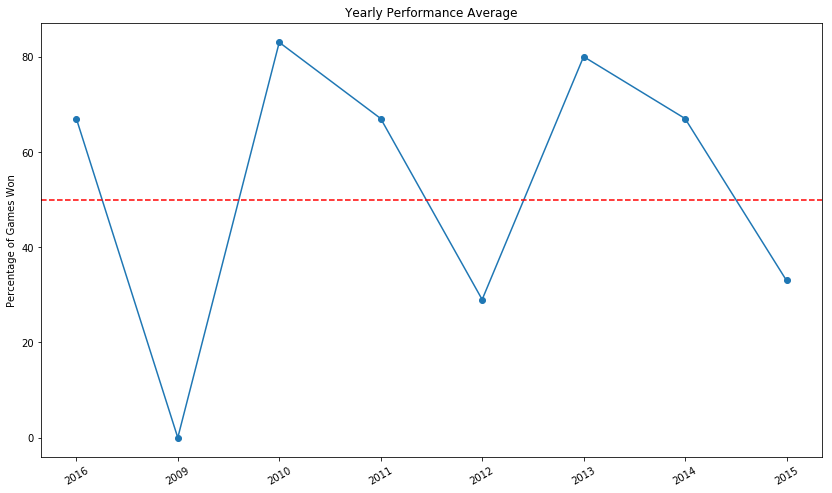

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ind = np.arange(len(years))  # the x locations for the groups

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

ax.plot(pct,linestyle='-',marker='.',markersize=12)
ax.axhline(50, color='r',linestyle='--')

# add some;
ax.set_ylabel('Percentage of Games Won');
ax.set_title('Yearly Performance Average');
ax.set_xticks(ind);
ax.set_xticklabels( (years),rotation=30 );
# ax.legend( (rects1[0], rects2[0]), ('Wins', 'Losses') );

### So his worst years were: 2009 and his best years were: 2010,2013. Let's dig a bit deeper to see how big of a factor location is for his performance.
### Let's check how the team did each year.

In [15]:
def wincount(dframe=dframe,years=years):
    l=0
    w=0
    tie=0
    for year in years:
        f,t = dframe.loc[year]['Europe_won'].value_counts(sort=False)
        print(f,t)
        if f>t:
            l+=1
        elif f<t:
            w+=1
        else:
            tie+=1
    return 'win-loss-tie: {}-{}-{}'.format(w,l,tie)
wincount()

3 11
11 7
8 11
7 11
9 11
2 11
5 11
7 11


'win-loss-tie: 7-1-0'

### Europe went 7-1 with him on the team

In [16]:
locs = pickle.load(open(path+'pkl/dloc','rb'))

In [17]:
hm = []
aw = []

for year in years:
    if 'USA' in locs[year]:
        if 'a' in team.lower():
            hm.append(year)
        else:
            aw.append(year)
    else:
        if 'a' in team.lower():
            aw.append(year)
        else:
            hm.append(year)
away = df.loc[aw]
home = df.loc[hm]

In [18]:
'Played home {} times, away {} times'.format(len(hm),len(aw))

'Played home 4 times, away 4 times'

In [19]:
'Home Games: {}'.format(stats(home))

"Home Games: ('Matches Played: 25', 'Win-loss: 15-10', 'Pct: 60.0')"

In [20]:
'Away Games: {}'.format(stats(away))

"Away Games: ('Matches Played: 22', 'Win-loss: 10-12', 'Pct: 45.0')"

### So he plays better at home.

### Let's drill down a bit further to parse out his singles and doubles matches for both home and away 

In [21]:
hsing = stats(home[home['Format']=='Singles'])

In [22]:
hdub = stats(home[home['Format']=='Doubles'])

In [23]:
asing = stats(away[away['Format']=='Singles'])

In [24]:
adub = stats(away[away['Format']=='Doubles'])

In [25]:
'Home Singles: {}'.format(hsing)
'Home Doubles: {}'.format(hdub)
'Away Singles: {}'.format(asing)
'Away Doubles: {}'.format(adub)

"Home Singles: ('Matches Played: 8', 'Win-loss: 7-1', 'Pct: 88.0')"

"Home Doubles: ('Matches Played: 13', 'Win-loss: 5-8', 'Pct: 38.0')"

"Away Singles: ('Matches Played: 6', 'Win-loss: 3-3', 'Pct: 50.0')"

"Away Doubles: ('Matches Played: 12', 'Win-loss: 5-7', 'Pct: 42.0')"

## Excellent singles record at home! (7-1)

# Summary

- Darren has performed *far* better in singles than doubles (71% vs. 40%)! 
- He has played *exceptionally* well against Shane Van Boening (6-1) 
- His singles record at home is *superb* (7-1)
- His play has been relatively consistent over the years
- He is **weak** in doubles matches, unless partnered with Boyes or Souquet

- He is somewhat **weak** in singles against Johnny Archer (0-2)
- Europe has a strong record with him on the team (7-1)